O objetivo deste trabalho é comparar diversos métodos de classificação para a base de dados de qualidade de vinhos disponível em https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv.

Vocês devem encontrar um bom modelo preditivo, variando:

o número e conjunto de features (atributos) utilizados
o método utilizado
a configuração do algoritmo correspondente (e.g.: número k para nearest neighbors, profundidade para árvore de decisão)
Vocês devem listar algumas métricas de qualidade, tais como: precision, recall, accuracy e f1_score, e utilizar accuracy como base para a avaliação final, considerando a accuracy média de 10 iterações para cada configuração.

Para assegurar que eu obterei os mesmos resultados de vocês, vocês devem estabelecer a semente para a geração dos números aleatórios (utilizados para separar os conjuntos de treinamento e teste, por exemplo), utilizando os seguintes comandos no início do seu código (podem utilizar uma outra semente):

import random
random.seed(1001001)

In [64]:
import pandas as pd

csv_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_raw = pd.read_csv(csv_file, sep=";")
wine_data = pd.DataFrame(wine_raw)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
wine_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


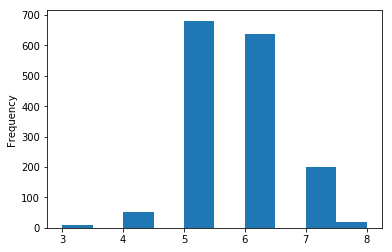

In [67]:
import matplotlib.pyplot as plt
wine_data.quality.plot(kind='hist')
plt.show()

In [114]:
import random
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
import math

# Definir seed utilizada
seed_num = 1001001

# Definir as features
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
            'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 
            'sulphates', 'alcohol', 'quality']
features = ['fixed acidity', 'volatile acidity', 'citric acid', 
            'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 
            'sulphates', 'alcohol']
outcome_column = 'quality'

outcome_labels = sorted(list(set(wine_data.quality)))
# print(outcome_labels)


Y = np.array(wine_data[outcome_column])

In [115]:
def define_training_test(attributes):
    # Separar os conjuntos de treino e teste
    Wine_Train, Wine_Test = train_test_split(wine_data, test_size=0.2, stratify=wine_data[outcome_column], random_state=np.random.seed(seed_num))

    # Converter os conjuntos de treino para array
    X_train = np.array(Wine_Train[attributes])
    Y_train = np.array(Wine_Train[outcome_column])
#     print(X_train.shape[0], Y_train.shape[0])

    # Converter os conjuntos de teste para array
    X_test = np.array(Wine_Test[attributes])
    Y_test = np.array(Wine_Test[outcome_column])
#     print(X_test.shape[0], Y_test.shape[0])

In [116]:
from sklearn import metrics

_Precision = 1
_Recall = 2
_F1Score = 3
_Accuracy = 4

_AverageOfAllScores = 1 # Calcula a precisão/f1_score/recall de cada label e depois faz a média delas
_OverallScore = 2 # Calcula a precisão/f1_score/recall global
_ScoreByLabel = 3 # Calcula a precisão/f1_score/recall de cada label e retorna elas em um array

def calculateScores(real_group, pred_group, score_type, average_type):
    if(average_type == _AverageOfAllScores):
        chosenAverage = "macro"
    elif(average_type == _OverallScore):
        chosenAverage = "micro"
    elif(average_type == _ScoreByLabel):
        chosenAverage = None
    
    if(score_type == _Precision):
        return metrics.precision_score(y_true=real_group, y_pred=pred_group, average=chosenAverage)
    elif(score_type == _Recall):
        return metrics.recall_score(y_true=real_group, y_pred=pred_group, average=chosenAverage)
    elif(score_type == _F1Score):
        return metrics.f1_score(y_true=real_group, y_pred=pred_group, average=chosenAverage)
    elif(score_type == _Accuracy):
        # Normalizar os dados: Calcula a acurácia
        # Sem normalizar os dados: Calcula o número total de TP
        return metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
    
    
scores = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

def showScoreResults(score_name, real_group, pred_group):
    if(score_name == scores[0]):
        method = _Precision
    elif(score_name == scores[1]):
        method = _Recall
    elif(score_name == scores[2]):
        method = _F1Score
    elif(score_name == scores[3]):
        method = _Accuracy
        
    if(method == _Precision or method == _Recall or method == _F1Score):
        score = calculateScores(real_group, pred_group, method, _AverageOfAllScores)
        print('Average of all labels' + score_name + ':', '{:6.4f}'.format(score))
        score = calculateScores(real_group, pred_group, method, _OverallScore)
        print('Overall' + score_name + ':', '{:6.4f}'.format(score))
        score = calculateScores(real_group, pred_group, method, _ScoreByLabel)
        print(score_name + ' By Label')
        for label in outcome_labels:
            index = outcome_labels.index(label)
            print('Label: ' + str(label) + '\t' + '{:6.4f}'.format(score[index]))
    elif(method == _Accuracy):
        score = calculateScores(real_group, pred_group, method, 0)
        print(score_name + ':', '{:6.4f}'.format(score))

def showScores_TrainAndTest():
    for score in scores:
        print('\n')
        print('# ' + score)
        print('#')
        print('# Training Data')
        showScoreResults(score, Y_train, Yhat_train)
        print('#')
        print('# Test Data')
        showScoreResults(score, Y_test, Yhat)

# k-nearest neighbor (kNN)

In [120]:
accuracy_total = []

for i in range (0, 10):
    attributes = random.sample(features, 10)
    
    X = np.array(wine_data[attributes])
    define_training_test(attributes)
    
    #Create an instance of K-nearest neighbor classifier
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
    
    #Train the classifier
    knn_model.fit(X_train,Y_train)

    #Compute the prediction according to the model
    Yhat = knn_model.predict(X_test)
    
    if(i == 0):
        print('Para um dos casos de teste:')
        Yhat_train = knn_model.predict(X_train)
        showScores_TrainAndTest();
        
    accuracy_total.append(metrics.accuracy_score(y_true=Y_test, y_pred=Yhat, normalize=True))

accuracy_avg = np.mean(accuracy_total)

print('\nAcurácia média para 10 casos de teste: ' + str(accuracy_avg))

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.5940
OverallPrecision: 0.6568
Precision By Label
Label: 3	1.0000
Label: 4	0.5455
Label: 5	0.6596
Label: 6	0.6457
Label: 7	0.7130
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.2461
OverallPrecision: 0.5062
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.5434
Label: 6	0.4750
Label: 7	0.4583
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.3838
OverallRecall: 0.6568
Recall By Label
Label: 3	0.2500
Label: 4	0.1429
Label: 5	0.8000
Label: 6	0.6255
Label: 7	0.4843
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.2352
OverallRecall: 0.5062
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.6912
Label: 6	0.4453
Label: 7	0.2750
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.4270
OverallF1 Score: 0.6568
F1 Score By Label
Label: 3	0.4000
Label: 4	0.2264
Label: 5	0.7231
Label: 6	0.6355
Label: 7	0

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Train the classifier
gnb.fit(X_train,Y_train)

Yhat_train = gnb.predict(X_train)

#Compute the prediction according to the model
Yhat = knn_model.predict(X_test)

print(Yhat[4])
print ('Predicted value: ' + str(Yhat[-1]), ', real target: ' + str(Y[-1]))

showScores_TrainAndTest(); 

6
Predicted value: 6 , real target: 6


# Precision
#
# Training Data
Average of all labelsPrecision: 0.4010
OverallPrecision: 0.5692
Precision By Label
Label: 3	0.3333
Label: 4	0.1277
Label: 5	0.6610
Label: 6	0.5659
Label: 7	0.4516
Label: 8	0.2667
#
# Test Data
Average of all labelsPrecision: 0.2461
OverallPrecision: 0.5062
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.5434
Label: 6	0.4750
Label: 7	0.4583
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.4065
OverallRecall: 0.5692
Recall By Label
Label: 3	0.2500
Label: 4	0.1429
Label: 5	0.7083
Label: 6	0.4549
Label: 7	0.6164
Label: 8	0.2667
#
# Test Data
Average of all labelsRecall: 0.2352
OverallRecall: 0.5062
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.6912
Label: 6	0.4453
Label: 7	0.2750
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.3994
OverallF1 Score: 0.5692
F1 Score By Label
Label: 3	0.2857
Label: 4	0.1348
Label: 5	0.6838
Label: 6	0.5043


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [81]:
from sklearn import tree
print(seed_num)

clf = tree.DecisionTreeClassifier(random_state=np.random.seed(seed_num))
#Train the classifier
clf = clf.fit(X_train,Y_train)

Yhat_train = clf.predict(X_train)

#Compute the prediction according to the model
Yhat = clf.predict(X_test)

print(Yhat[4])
print ('Predicted value: ' + str(Yhat[-1]), ', real target: ' + str(Y[-1]))

showScores_TrainAndTest(); 

1001001
5
Predicted value: 6 , real target: 6


# Precision
#
# Training Data
Average of all labelsPrecision: 1.0000
OverallPrecision: 1.0000
Precision By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Test Data
Average of all labelsPrecision: 0.3280
OverallPrecision: 0.6562
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.7259
Label: 6	0.6567
Label: 7	0.5854
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 1.0000
OverallRecall: 1.0000
Recall By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Test Data
Average of all labelsRecall: 0.3347
OverallRecall: 0.6562
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.7206
Label: 6	0.6875
Label: 7	0.6000
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 1.0000
OverallF1 Score: 1.0000
F1 Score By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Regressão Logística

In [84]:
from sklearn import linear_model
from sklearn.metrics import classification_report

classifier = linear_model.LogisticRegression(random_state=np.random.seed(seed_num))
classifier.fit(X_train, Y_train)
Yhat = classifier.predict(X_test)

showScores_TrainAndTest(); 



# Precision
#
# Training Data
Average of all labelsPrecision: 1.0000
OverallPrecision: 1.0000
Precision By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Test Data
Average of all labelsPrecision: 0.2565
OverallPrecision: 0.5938
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.6561
Label: 6	0.5497
Label: 7	0.3333
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 1.0000
OverallRecall: 1.0000
Recall By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Test Data
Average of all labelsRecall: 0.2510
OverallRecall: 0.5938
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.7574
Label: 6	0.6484
Label: 7	0.1000
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 1.0000
OverallF1 Score: 1.0000
F1 Score By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Te

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support vector machines 

In [87]:
from sklearn import svm

clf = svm.SVC(random_state = np.random.seed(seed_num))
clf.fit(X_train, Y_train)
clf.predict(X_test)

showScores_TrainAndTest();



# Precision
#
# Training Data
Average of all labelsPrecision: 1.0000
OverallPrecision: 1.0000
Precision By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Test Data
Average of all labelsPrecision: 0.2565
OverallPrecision: 0.5938
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.6561
Label: 6	0.5497
Label: 7	0.3333
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 1.0000
OverallRecall: 1.0000
Recall By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Test Data
Average of all labelsRecall: 0.2510
OverallRecall: 0.5938
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.7574
Label: 6	0.6484
Label: 7	0.1000
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 1.0000
OverallF1 Score: 1.0000
F1 Score By Label
Label: 3	1.0000
Label: 4	1.0000
Label: 5	1.0000
Label: 6	1.0000
Label: 7	1.0000
Label: 8	1.0000
#
# Te

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
